In [2]:
import pandas as pd
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting

In [3]:
buy_train = pd.read_csv('data/train/train_buy_info.csv')
cust_train = pd.read_csv('data/train/train_cust_info.csv')
typ_train = pd.read_csv('data/train/train_tpy_info.csv')
print(buy_train.shape, cust_train.shape, typ_train.shape)

(229504, 13) (229504, 28) (229504, 8)


#### Handling Missing Values

In [4]:
print(buy_train.isnull().sum())
print(cust_train.isnull().sum())
print(cust_train.isnull().sum())

# Too much is missing, remove first
# cust_train = cust_train.drop(['STATUS1', 'STATUS2', 'STATUS3', 'STATUS4', 
#                                'IS_NEWSLETTER', 'INTEREST1', 'INTEREST2', 
#                                'INTEREST3', 'INTEREST4', 'INTEREST5', 'INTEREST6', 
#                                'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10'], axis = 1)

CUST_ID           0
BUY_TYPE          0
AGE               0
SEX               0
HEIGHT        16808
WEIGHT        16808
OCCUPATION        0
CHILD_NUM         0
BUY_MONTH         0
BUY_YEAR          0
CITY_CODE         0
BUDGET            0
MARRIAGE          0
dtype: int64
CUST_ID                  0
BEHAVIOR_1            5041
BEHAVIOR_2            5041
BEHAVIOR_3            6494
STATUS1             211071
STATUS2             211071
STATUS3             211071
STATUS4             211071
EDUCATION                0
IS_NEWSLETTER       160314
CHARGE_WAY           64095
IS_EMAIL                 8
IS_PHONE                 8
INTEREST1           209654
INTEREST2           209654
INTEREST3           209654
INTEREST4           209654
INTEREST5           209654
INTEREST6           209654
INTEREST7           209654
INTEREST8           209654
INTEREST9           209654
INTEREST10          209654
IS_APP                   8
IS_SPECIALMEMBER        28
PARENTS_DEAD             0
REAL_ESTATE_HAVE         

In [5]:
cust_train.dtypes

CUST_ID              int64
BEHAVIOR_1          object
BEHAVIOR_2          object
BEHAVIOR_3          object
STATUS1             object
STATUS2             object
STATUS3             object
STATUS4             object
EDUCATION           object
IS_NEWSLETTER       object
CHARGE_WAY          object
IS_EMAIL            object
IS_PHONE            object
INTEREST1           object
INTEREST2           object
INTEREST3           object
INTEREST4           object
INTEREST5           object
INTEREST6           object
INTEREST7           object
INTEREST8           object
INTEREST9           object
INTEREST10          object
IS_APP              object
IS_SPECIALMEMBER    object
PARENTS_DEAD        object
REAL_ESTATE_HAVE    object
IS_MAJOR_INCOME     object
dtype: object

In [6]:
# filling with mode
for i in cust_train:
    if i != 'CUST_ID':
        cust_train[i] = cust_train[i].fillna(cust_train[i].mode()[0])
cust_train.isnull().sum()

CUST_ID             0
BEHAVIOR_1          0
BEHAVIOR_2          0
BEHAVIOR_3          0
STATUS1             0
STATUS2             0
STATUS3             0
STATUS4             0
EDUCATION           0
IS_NEWSLETTER       0
CHARGE_WAY          0
IS_EMAIL            0
IS_PHONE            0
INTEREST1           0
INTEREST2           0
INTEREST3           0
INTEREST4           0
INTEREST5           0
INTEREST6           0
INTEREST7           0
INTEREST8           0
INTEREST9           0
INTEREST10          0
IS_APP              0
IS_SPECIALMEMBER    0
PARENTS_DEAD        0
REAL_ESTATE_HAVE    0
IS_MAJOR_INCOME     0
dtype: int64

#### merge dataset

In [7]:
start_train = pd.merge(buy_train, cust_train, on = "CUST_ID", how = "inner")
train = pd.merge(start_train, typ_train, on = "CUST_ID", how = "inner")
print(train.shape, buy_train.shape, typ_train.shape)

(229504, 47) (229504, 13) (229504, 8)


In [8]:
train.isnull().sum()

CUST_ID                   0
BUY_TYPE                  0
AGE                       0
SEX                       0
HEIGHT                16808
WEIGHT                16808
OCCUPATION                0
CHILD_NUM                 0
BUY_MONTH                 0
BUY_YEAR                  0
CITY_CODE                 0
BUDGET                    0
MARRIAGE                  0
BEHAVIOR_1                0
BEHAVIOR_2                0
BEHAVIOR_3                0
STATUS1                   0
STATUS2                   0
STATUS3                   0
STATUS4                   0
EDUCATION                 0
IS_NEWSLETTER             0
CHARGE_WAY                0
IS_EMAIL                  0
IS_PHONE                  0
INTEREST1                 0
INTEREST2                 0
INTEREST3                 0
INTEREST4                 0
INTEREST5                 0
INTEREST6                 0
INTEREST7                 0
INTEREST8                 0
INTEREST9                 0
INTEREST10                0
IS_APP              

fill NaN

In [9]:
# dropna_train = train.drop(['OCCUPATION'], axis=1)
# dropna_train['AGE'] = dropna_train['AGE'].fillna(dropna_train['AGE'].mode()[0])
# dropna_train['SEX'] = dropna_train['SEX'].fillna(dropna_train['SEX'].mode()[0])
# dropna_train['BUY_YEAR'] = dropna_train['BUY_YEAR'].fillna(dropna_train['BUY_YEAR'].mode()[0])
# dropna_train['CITY_CODE'] = dropna_train['CITY_CODE'].fillna(dropna_train['CITY_CODE'].mode()[0])
# dropna_train['MARRIAGE'] = dropna_train['MARRIAGE'].fillna(dropna_train['MARRIAGE'].mode()[0])
# dropna_train['BUY_TPY1_NUM_CLASS'] = dropna_train['BUY_TPY1_NUM_CLASS'].fillna(dropna_train['BUY_TPY1_NUM_CLASS'].mode()[0])
# dropna_train['BUY_TPY2_NUM_CLASS'] = dropna_train['BUY_TPY2_NUM_CLASS'].fillna(dropna_train['BUY_TPY2_NUM_CLASS'].mode()[0])
# dropna_train['BUY_TPY3_NUM_CLASS'] = dropna_train['BUY_TPY3_NUM_CLASS'].fillna(dropna_train['BUY_TPY3_NUM_CLASS'].mode()[0])
# dropna_train['BUY_TPY4_NUM_CLASS'] = dropna_train['BUY_TPY4_NUM_CLASS'].fillna(dropna_train['BUY_TPY4_NUM_CLASS'].mode()[0])
# dropna_train['BUY_TPY5_NUM_CLASS'] = dropna_train['BUY_TPY5_NUM_CLASS'].fillna(dropna_train['BUY_TPY5_NUM_CLASS'].mode()[0])
# dropna_train['BUY_TPY6_NUM_CLASS'] = dropna_train['BUY_TPY6_NUM_CLASS'].fillna(dropna_train['BUY_TPY6_NUM_CLASS'].mode()[0])
# dropna_train['BUY_TPY7_NUM_CLASS'] = dropna_train['BUY_TPY7_NUM_CLASS'].fillna(dropna_train['BUY_TPY7_NUM_CLASS'].mode()[0])
train = train.replace(np.nan, train.median())
print(train.dtypes)
print(train.shape)
train.head(3)

CUST_ID                 int64
BUY_TYPE               object
AGE                    object
SEX                    object
HEIGHT                float64
WEIGHT                float64
OCCUPATION             object
CHILD_NUM               int64
BUY_MONTH               int64
BUY_YEAR               object
CITY_CODE              object
BUDGET                float64
MARRIAGE               object
BEHAVIOR_1             object
BEHAVIOR_2             object
BEHAVIOR_3             object
STATUS1                object
STATUS2                object
STATUS3                object
STATUS4                object
EDUCATION              object
IS_NEWSLETTER          object
CHARGE_WAY             object
IS_EMAIL               object
IS_PHONE               object
INTEREST1              object
INTEREST2              object
INTEREST3              object
INTEREST4              object
INTEREST5              object
INTEREST6              object
INTEREST7              object
INTEREST8              object
INTEREST9 

,CUST_ID,BUY_TYPE,AGE,SEX,HEIGHT,WEIGHT,OCCUPATION,CHILD_NUM,BUY_MONTH,BUY_YEAR,...,PARENTS_DEAD,REAL_ESTATE_HAVE,IS_MAJOR_INCOME,BUY_TPY1_NUM_CLASS,BUY_TPY2_NUM_CLASS,BUY_TPY3_NUM_CLASS,BUY_TPY4_NUM_CLASS,BUY_TPY5_NUM_CLASS,BUY_TPY6_NUM_CLASS,BUY_TPY7_NUM_CLASS
0,2903965,a,d,a,0.290444,-0.069464,q37,0,9,T,...,B,B,A,E,G,G,G,G,G,G
1,2815518,a,k,a,0.290444,0.210564,i37,0,1,T,...,B,B,A,D,G,G,G,G,G,G
2,526983,d,j,a,0.172307,-0.162807,i37,2,10,T,...,B,B,A,G,F,G,F,G,E,E


In [10]:
train.isnull().sum()

CUST_ID               0
BUY_TYPE              0
AGE                   0
SEX                   0
HEIGHT                0
WEIGHT                0
OCCUPATION            0
CHILD_NUM             0
BUY_MONTH             0
BUY_YEAR              0
CITY_CODE             0
BUDGET                0
MARRIAGE              0
BEHAVIOR_1            0
BEHAVIOR_2            0
BEHAVIOR_3            0
STATUS1               0
STATUS2               0
STATUS3               0
STATUS4               0
EDUCATION             0
IS_NEWSLETTER         0
CHARGE_WAY            0
IS_EMAIL              0
IS_PHONE              0
INTEREST1             0
INTEREST2             0
INTEREST3             0
INTEREST4             0
INTEREST5             0
INTEREST6             0
INTEREST7             0
INTEREST8             0
INTEREST9             0
INTEREST10            0
IS_APP                0
IS_SPECIALMEMBER      0
PARENTS_DEAD          0
REAL_ESTATE_HAVE      0
IS_MAJOR_INCOME       0
BUY_TPY1_NUM_CLASS    0
BUY_TPY2_NUM_CLA

#### Preprocessing Data

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train = train.drop(['BUY_TYPE', 'CUST_ID', 'OCCUPATION'], axis=1)
y_train = train['BUY_TYPE']

cat_col_list = x_train.select_dtypes(include=['object']).columns
print(cat_col_list)
cat_df = x_train[cat_col_list]
num_df = x_train.drop(cat_col_list, axis=1)

#normalize
num_df = num_df.values
mean = np.mean(num_df, axis = 0)
std = np.std(num_df, axis = 0)
#print(mean, std)
num_df = (num_df - mean) / std

#category label encoding
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# for i in cat_col_list:
#     x_train[i] = encoder.fit_transform(x_train[i])

# category one-hot encoding
for i in cat_col_list:
    tmp = pd.get_dummies(x_train[i], prefix = i)
    cat_df = pd.concat([cat_df, tmp], axis=1)
    cat_df.drop([i], axis=1, inplace=True)
    print(list(tmp))
print(cat_df.shape)

cat_df = cat_df.drop(['BUY_TPY3_NUM_CLASS_C', 'BUY_TPY4_NUM_CLASS_A', 'BUY_TPY5_NUM_CLASS_A', 'BUY_TPY5_NUM_CLASS_B', 'BUY_TPY6_NUM_CLASS_A'], axis = 1)


# for i in cat_df:
#     print(i)

x_train = np.concatenate([num_df, cat_df], axis = 1)
y_train = y_train.values

#x_train = pd.concat([cat_df,num_df],axis=1, join_axes=[catt_df.index])

x_train.shape

Index(['AGE', 'SEX', 'BUY_YEAR', 'CITY_CODE', 'MARRIAGE', 'BEHAVIOR_1',
       'BEHAVIOR_2', 'BEHAVIOR_3', 'STATUS1', 'STATUS2', 'STATUS3', 'STATUS4',
       'EDUCATION', 'IS_NEWSLETTER', 'CHARGE_WAY', 'IS_EMAIL', 'IS_PHONE',
       'INTEREST1', 'INTEREST2', 'INTEREST3', 'INTEREST4', 'INTEREST5',
       'INTEREST6', 'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10',
       'IS_APP', 'IS_SPECIALMEMBER', 'PARENTS_DEAD', 'REAL_ESTATE_HAVE',
       'IS_MAJOR_INCOME', 'BUY_TPY1_NUM_CLASS', 'BUY_TPY2_NUM_CLASS',
       'BUY_TPY3_NUM_CLASS', 'BUY_TPY4_NUM_CLASS', 'BUY_TPY5_NUM_CLASS',
       'BUY_TPY6_NUM_CLASS', 'BUY_TPY7_NUM_CLASS'],
      dtype='object')
['AGE_a', 'AGE_b', 'AGE_c', 'AGE_d', 'AGE_e', 'AGE_f', 'AGE_g', 'AGE_h', 'AGE_i', 'AGE_j', 'AGE_k', 'AGE_l', 'AGE_m', 'AGE_n', 'AGE_o', 'AGE_p', 'AGE_q']
['SEX_a', 'SEX_b']
['BUY_YEAR_T']
['CITY_CODE_a', 'CITY_CODE_b', 'CITY_CODE_c', 'CITY_CODE_d', 'CITY_CODE_e', 'CITY_CODE_f', 'CITY_CODE_g', 'CITY_CODE_h', 'CITY_CODE_i', 'CITY_CODE_j', 

(229504, 152)

In [12]:
x_train

array([[ 0.21911775, -0.17376671, -0.46837873, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.21911775,  0.13813978, -0.46837873, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.0791816 , -0.27773554,  1.5965455 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28908582,  0.34607744, -0.46837873, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.84883041,  0.29409302, -0.46837873, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.32406986, -0.06979788, -0.46837873, ...,  1.        ,
         0.        ,  0.        ]])

PCA

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
pca.fit(x_train)
x_train = pca.transform(x_train)
print(x_train)
x_train = pd.DataFrame(x_train)

Train Model(KNN)

In [ ]:
# train test split (validation set)
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(y_pred)

# testing accuracy
test_accuracy = np.sum(Y_test == y_pred) / len(Y_test)
print('validation accuray:', test_accuracy)

SVM Classifier(Failed)

In [ ]:
# train test split (no validation set)
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

# SVM classifier
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, Y_train)

# testing accuracy
test_accuracy = np.sum(Y_test == y_pred) / len(Y_test)
print('validation accuray:', test_accuracy)

Dense Neural Network

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create label encoder
encoder = LabelEncoder()
y_ordinal = encoder.fit_transform(y_train)  # fit (get all categories) and transform (ordinal encoding)


from sklearn.preprocessing import OneHotEncoder

# convert array into matrix (column)
y_ordinal = y_ordinal.reshape(len(y_ordinal), 1)

# create label encoder
encoder = OneHotEncoder(sparse=False)
y_train_nn = encoder.fit_transform(y_ordinal)

In [38]:
# 導入函式庫
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train_nn, test_size=0.20, random_state=1)

# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=125, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=7, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=20, batch_size=100, verbose=2)  

# 顯示訓練成果(分數)
scores = model.evaluate(X_test, Y_test)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

# # 預測(prediction)
# X = x_Test_norm[0:10,:]
# predictions = model.predict_classes(X)
# # get prediction result
# print(predictions)

Train on 146882 samples, validate on 36721 samples
Epoch 1/20
 - 5s - loss: 0.2862 - acc: 0.8939 - val_loss: 0.2256 - val_acc: 0.9099
Epoch 2/20
 - 4s - loss: 0.2164 - acc: 0.9115 - val_loss: 0.2222 - val_acc: 0.9100
Epoch 3/20
 - 4s - loss: 0.2083 - acc: 0.9144 - val_loss: 0.2175 - val_acc: 0.9110
Epoch 4/20
 - 4s - loss: 0.2023 - acc: 0.9174 - val_loss: 0.2132 - val_acc: 0.9126
Epoch 5/20
 - 4s - loss: 0.1978 - acc: 0.9198 - val_loss: 0.2105 - val_acc: 0.9158
Epoch 6/20
 - 4s - loss: 0.1939 - acc: 0.9212 - val_loss: 0.2151 - val_acc: 0.9122
Epoch 7/20
 - 4s - loss: 0.1898 - acc: 0.9233 - val_loss: 0.2133 - val_acc: 0.9139
Epoch 8/20
 - 4s - loss: 0.1865 - acc: 0.9244 - val_loss: 0.2114 - val_acc: 0.9150
Epoch 9/20
 - 5s - loss: 0.1832 - acc: 0.9265 - val_loss: 0.2156 - val_acc: 0.9141
Epoch 10/20
 - 4s - loss: 0.1801 - acc: 0.9267 - val_loss: 0.2132 - val_acc: 0.9156
Epoch 11/20
 - 4s - loss: 0.1763 - acc: 0.9292 - val_loss: 0.2177 - val_acc: 0.9157
Epoch 12/20
 - 4s - loss: 0.1740 -

In [60]:
#X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X_test)
# get prediction result
predictions

array([0, 2, 3, ..., 0, 4, 2])

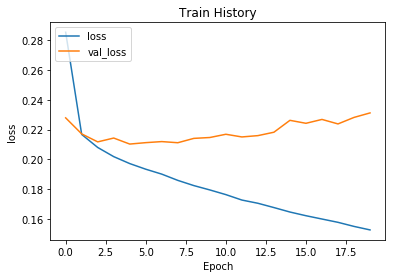

In [66]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

In [11]:
buy_test = pd.read_csv(r'data/test/test_buy_x_info.csv')
cust_test = pd.read_csv(r'data/test/test_cust_x_info.csv')
typ_test = pd.read_csv(r'data/test/test_tpy_x_info.csv')

In [12]:
print(cust_test.isnull().sum())
cust_test = cust_test.drop(['STATUS1', 'STATUS2', 'STATUS3', 'STATUS4', 'IS_NEWSLETTER', 'INTEREST1', 'INTEREST2', 'INTEREST3', 'INTEREST4', 'INTEREST5', 'INTEREST6', 'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10'], axis = 1)


CUST_ID                0
BEHAVIOR_1           216
BEHAVIOR_2           216
BEHAVIOR_3           260
STATUS1             9228
STATUS2             9228
STATUS3             9228
STATUS4             9228
EDUCATION              0
IS_NEWSLETTER       6940
CHARGE_WAY          2760
IS_EMAIL               0
IS_PHONE               0
INTEREST1           9127
INTEREST2           9127
INTEREST3           9127
INTEREST4           9127
INTEREST5           9127
INTEREST6           9127
INTEREST7           9127
INTEREST8           9127
INTEREST9           9127
INTEREST10          9127
IS_APP                 0
IS_SPECIALMEMBER       1
PARENTS_DEAD           0
REAL_ESTATE_HAVE       0
IS_MAJOR_INCOME        0
dtype: int64


In [72]:
for i in cust_test:
    if i != 'CUST_ID':
        cust_test[i] = cust_test[i].fillna(cust_test[i].mode()[0])
cust_test.isnull().sum()

CUST_ID             0
BEHAVIOR_1          0
BEHAVIOR_2          0
BEHAVIOR_3          0
EDUCATION           0
CHARGE_WAY          0
IS_EMAIL            0
IS_PHONE            0
IS_APP              0
IS_SPECIALMEMBER    0
PARENTS_DEAD        0
REAL_ESTATE_HAVE    0
IS_MAJOR_INCOME     0
dtype: int64

In [73]:
start_test = pd.merge(buy_test, cust_test, on = "CUST_ID", how = "inner")
test = pd.merge(start_test, typ_test, on = "CUST_ID", how = "inner")
print(test.shape, buy_test.shape, typ_test.shape)

(10000, 31) (10000, 12) (10000, 8)


In [76]:
test = test.replace(np.nan, test.median())
test.isnull().sum()

CUST_ID               0
AGE                   0
SEX                   0
HEIGHT                0
WEIGHT                0
OCCUPATION            0
CHILD_NUM             0
BUY_MONTH             0
BUY_YEAR              0
CITY_CODE             0
BUDGET                0
MARRIAGE              0
BEHAVIOR_1            0
BEHAVIOR_2            0
BEHAVIOR_3            0
EDUCATION             0
CHARGE_WAY            0
IS_EMAIL              0
IS_PHONE              0
IS_APP                0
IS_SPECIALMEMBER      0
PARENTS_DEAD          0
REAL_ESTATE_HAVE      0
IS_MAJOR_INCOME       0
BUY_TPY1_NUM_CLASS    0
BUY_TPY2_NUM_CLASS    0
BUY_TPY3_NUM_CLASS    0
BUY_TPY4_NUM_CLASS    0
BUY_TPY5_NUM_CLASS    0
BUY_TPY6_NUM_CLASS    0
BUY_TPY7_NUM_CLASS    0
dtype: int64

In [91]:
x_test = test.drop(['CUST_ID', 'OCCUPATION'], axis=1)

cat_col_list = x_test.select_dtypes(include=['object']).columns
print(cat_col_list)
catt_df = x_test[cat_col_list]
num_df = x_test.drop(cat_col_list, axis=1)

#normalize
num_np = num_df.values
mean = np.mean(num_np, axis = 0)
std = np.std(num_np, axis = 0)
#print(mean, std)
num_np = (num_np - mean) / std

#category label encoding
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# for i in cat_col_list:
#     x_train[i] = encoder.fit_transform(x_train[i])

# category one-hot encoding
for i in cat_col_list:
    tmp = pd.get_dummies(x_test[i], prefix = i)
    catt_df = pd.concat([catt_df, tmp], axis=1)
    catt_df.drop([i], axis=1, inplace=True)
print(catt_df.shape)

# for i in cat_df:
#     print(i)

x_test = np.concatenate([num_np, catt_df], axis = 1)

#x_train = pd.concat([cat_df,num_df],axis=1, join_axes=[catt_df.index])

x_test.shape

Index(['AGE', 'SEX', 'BUY_YEAR', 'CITY_CODE', 'MARRIAGE', 'BEHAVIOR_1',
       'BEHAVIOR_2', 'BEHAVIOR_3', 'EDUCATION', 'CHARGE_WAY', 'IS_EMAIL',
       'IS_PHONE', 'IS_APP', 'IS_SPECIALMEMBER', 'PARENTS_DEAD',
       'REAL_ESTATE_HAVE', 'IS_MAJOR_INCOME', 'BUY_TPY1_NUM_CLASS',
       'BUY_TPY2_NUM_CLASS', 'BUY_TPY3_NUM_CLASS', 'BUY_TPY4_NUM_CLASS',
       'BUY_TPY5_NUM_CLASS', 'BUY_TPY6_NUM_CLASS', 'BUY_TPY7_NUM_CLASS'],
      dtype='object')
(10000, 120)


(10000, 125)

In [105]:
#X = x_Test_norm[0:10,:]
predictions = model.predict_classes(x_test)
# get prediction result
predictions

array([4, 3, 0, ..., 3, 5, 3])

In [106]:
# Submission dataframe
submit = test[['CUST_ID']]
submit['BUY_TYPE'] = predictions

submit

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CUST_ID,BUY_TYPE
0,2353325,4
1,1097571,3
2,2795034,0
3,48210,0
4,1582776,0
5,1123183,3
6,1510150,2
7,2177914,4
8,2423517,0
9,460160,0


In [107]:
submit.to_csv('/Users/yuhsuan/Desktop/cathaybigdata.csv', index = False)